In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

d:\Users\Mr.Glor\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Split dataset into training and testing sets
X, y = mnist["data"], mnist["target"].astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Save the test sets for later use
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

In [5]:
# Train Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Save the trained model
joblib.dump(forest, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [7]:
# Train Logistic Regression Classifier
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

d:\Users\Mr.Glor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [8]:
# Save the trained model
joblib.dump(log_reg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [9]:
# Load the trained models
forest = joblib.load('random_forest_model.pkl')
log_reg = joblib.load('logistic_regression_model.pkl')

In [10]:
# Load the test dataset
X_test = joblib.load('X_test.pkl')
y_test = joblib.load('y_test.pkl')

In [11]:
# Evaluate Random Forest Classifier
y_pred_forest = forest.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred_forest)
print('Random Forest Accuracy:', forest_accuracy)

Random Forest Accuracy: 0.9672857142857143


In [12]:
# Evaluate Logistic Regression Classifier
y_pred_lr = log_reg.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Accuracy:', lr_accuracy)

Logistic Regression Accuracy: 0.9160714285714285


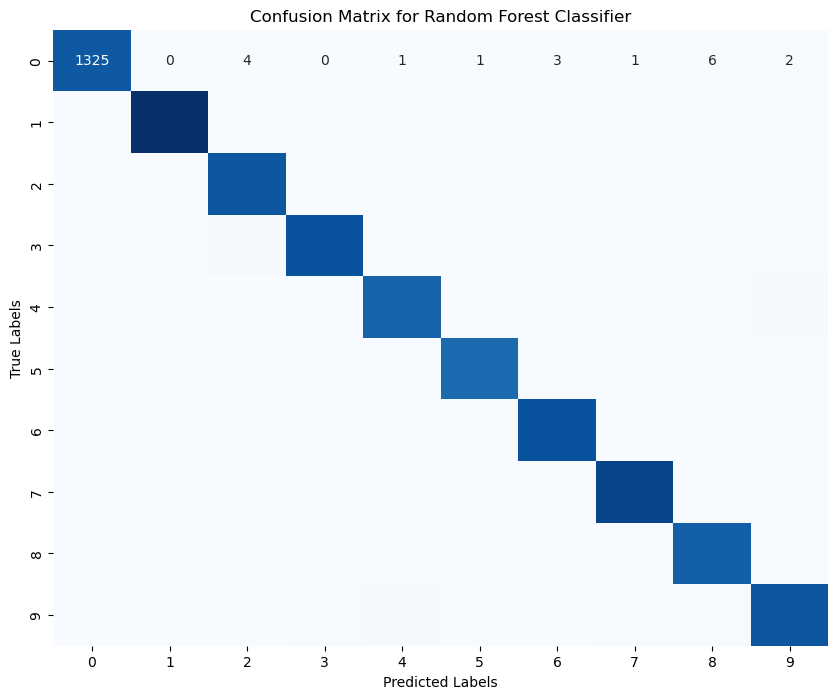

In [13]:
# Visualize Confusion Matrix for Random Forest Classifier
forest_cm = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(10, 8))
sns.heatmap(forest_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [14]:
# Add additional code to compare and choose the best model
best_model = 'Random Forest' if forest_accuracy > lr_accuracy else 'Logistic Regression'
print(f"The best model is: {best_model}")

The best model is: Random Forest
